# 配置环境

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
print(os.path.abspath(os.path.join(os.getcwd(), "..")))

/workspaces/handson-ml2


In [4]:
os.path.join(os.getcwd(),"..")

'/workspaces/handson-ml2/homework/..'

In [5]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "homework2"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 准备数据

## 下载数据

In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
print(type(mnist))

<class 'sklearn.utils._bunch.Bunch'>


In [8]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

Saving figure some_digit_plot


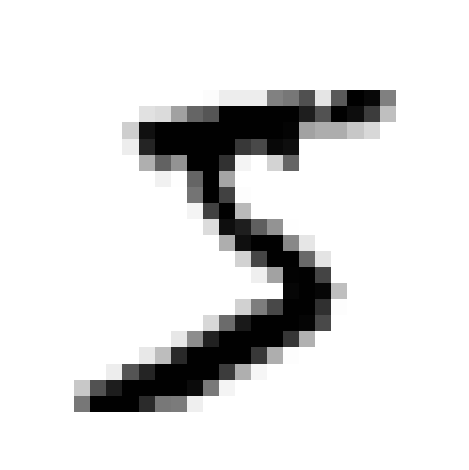

In [9]:
# 查看数据

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [10]:
y[0]

'5'

In [11]:
type(y), type(y[0])

(numpy.ndarray, str)

In [12]:
y = y.astype(np.uint8)

## 数据分析

In [14]:
from collections import Counter

counter = Counter(y)

In [15]:
# 可以看出样本分布比较均匀，直接纯随机采样即可

counter

Counter({5: 6313,
         0: 6903,
         4: 6824,
         1: 7877,
         9: 6958,
         2: 6990,
         3: 7141,
         6: 6876,
         7: 7293,
         8: 6825})

## 分割数据集

In [16]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y = train_test_split(X, y, test_size=0.2,random_state=5)

In [17]:
train_X.shape, train_y.shape

((56000, 784), (56000,))

In [18]:
test_X.shape, test_y.shape

((14000, 784), (14000,))

# 训练多分类器

使用KNN算法

algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=4, p=2, weights='distance'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [16]:
temp_X = X[0:100]
temp_y = y[0:100]

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(temp_X, temp_y)

KNeighborsClassifier()

In [18]:
knn_clf.score(temp_X, temp_y)

0.83